In [1]:
from random import shuffle
from math import *
import pandas as pd
import matplotlib.pyplot as plt

# Hill Climbing for TCP

### File berlin52.txt
### Benchmark berlin52 : 7542
### My best: 7772

In [4]:
# зчитування координатів з файлу
def readCoordinates(inputFile):
    cityCoordinates = []

    data = open(inputFile)

    for line in data:
        if ' ' in line:
            x, y = line.strip().split(' ')
            cityCoordinates.append((float(x), float(y)))
    return cityCoordinates


#def calcDistances(cityCoordinates):
#    distances = {}
#
#    for i, (x1, y1) in enumerate(cityCoordinates):
#        for j, (x2, y2) in enumerate(cityCoordinates):
#            distances[i, j] = ceil(sqrt((x2-x1)**2 + (y2-y1)**2))
#    return distances
#
#
#def calcDistances(cityCoordinates):
#    n = len(cityCoordinates)
#    distances = [[0] * n for _ in range(n)]
#
#    for i in range(n):
#        for j in range(n):
#            x1, y1 = cityCoordinates[i]
#            x2, y2 = cityCoordinates[j]
#            distances[i][j] = ceil(sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2))
#    return distances
                
        
# генерування сусідів (перестановки)
def generateNeighbours(tour):
    # згенер. 2 рандомні послідовності
    randomSequence1 = range(len(tour))
    shuffle(list(randomSequence1))
    randomSequence2 = range(len(tour))
    shuffle(list(randomSequence2))

    # генер. всіх сусідів початкового туру
    for i in randomSequence1:
        for j in randomSequence2:

            # не перевертати ті самі пари двічі
            if i < j:
                temp = list(tour)
                temp[i], temp[j] = tour[j], tour[i]
                yield temp
                
                
# генерування сусідів (2опт)               
def generateNeighbours2Opt(tour):
    n = len(tour)
    for i in range(n - 1):
        for j in range(i + 2, n):
            # Сусідні вершини
            if j - i == 2:
                continue
          
            newTour = tour[:i] + tour[i:j][::-1] + tour[j:]
            yield newTour
            

# генерування рандомного початкового туру
def generateInitialTour(numberOfCities):
    tour = list(range(numberOfCities))
    shuffle(tour)
    return tour


# розрахунок цільової функції
def objectiveFunction(cityCoordinates, tour):
    tourLength = 0
    n = len(tour)
    
    for i in range(n):
        j = (i + 1) % n
        x1, y1 = cityCoordinates[tour[i]]
        x2, y2 = cityCoordinates[tour[j]]
        distance = ceil(sqrt((x2 - x1)**2 + (y2 - y1)**2))
        tourLength += distance
    
    return tourLength


# порівнює всі можливі наступники позиції на пагорбі та вибирає кращий серед них.
# потім він порівнює поточне значення з найкращим сусідом. Якщо сусід кращий, він стає новим кращим
def hillClimbing(numberOfCities, maxIterations, coordinates, numberOfStarts):
    tours = pd.DataFrame(columns={"tour" : 1, "value": 2, "change": 3})
    
    for i in range(numberOfStarts):
        bestTour = generateInitialTour(numberOfCities)
        bestValue = objectiveFunction(coordinates, bestTour)
        #counter = 0
        tmpChange = []
        tmpChange.append(bestValue)
        
        for i in range(maxIterations):
            #moved = False

            # перевірка всіх сусідів поточного значення шляхом ітерації через генератор
            for neighbour in generateNeighbours2Opt(bestTour):
                neighbourValue = objectiveFunction(coordinates, neighbour)
                
                # рух на гору, якщо сусід кращий за поточне значення
                if neighbourValue < bestValue:
                    bestTour = neighbour
                    bestValue = neighbourValue
                    #counter += 1
                    #moved = True
                    tmpChange.append(bestValue)
                    break

            #if moved == False:
                #break
                
        tours.loc[len(tours)] = [bestTour, bestValue, tmpChange] 
        
    return (tours)


def calcCharacteristics(tours):
    bestTour = tours[tours['value'] == min(tours['value'])]
    worstTour = tours[tours['value'] == max(tours['value'])]
    
    difference = worstTour['value'].values[0] - bestTour['value'].values[0]
    
    return (bestTour, worstTour, difference)


def printCharacteristics(tours, bestTour, worstTour, difference) :
    print("Tours:")
    display(tours) 
    
    print("Best tour:")
    display(bestTour.style.hide_index()) 
    
    print("Worst tour:")
    display(worstTour.style.hide_index())
    
    print("Difference: ", difference)
    
    
def printHist(tours):
    plt.figure(figsize=(20, 12))
    plt.hist(tours['value'].values)
    plt.xlabel('F(x)')
    plt.ylabel("Count")
    plt.title("Histogram of the obtained solutions")
    plt.show()

    
def printDiagram(tours, iterations):
    res = tours['change'][0] + tours['change'][1] + tours['change'][2]
    plt.figure(figsize=(20, 12))
    plt.plot(range(len(res)), res)
    plt.xlabel('Iterations')
    plt.ylabel("F(x)")
    plt.title("Graph of convergence of the objective function")
    plt.show()

Tours:


,tour,value,change
0,"[44, 18, 40, 8, 7, 9, 42, 32, 50, 11, 27, 26, ...",8758,"[30191, 30167, 30007, 29987, 29860, 29742, 295..."
1,"[17, 21, 0, 43, 45, 28, 15, 46, 25, 27, 26, 12...",9263,"[27877, 27018, 26950, 26543, 26480, 26222, 260..."
2,"[3, 24, 11, 27, 26, 46, 25, 13, 12, 51, 10, 50...",8620,"[30637, 30567, 30503, 30263, 30257, 29777, 297..."
3,"[30, 21, 0, 48, 31, 44, 18, 7, 40, 8, 9, 42, 3...",8575,"[29596, 29222, 29141, 28609, 28514, 28263, 282..."
4,"[47, 45, 43, 33, 36, 37, 39, 38, 35, 34, 31, 4...",9027,"[30283, 29714, 29313, 29306, 29296, 29260, 292..."
...,...,...,...
495,"[23, 37, 39, 38, 35, 34, 33, 43, 15, 28, 49, 1...",8570,"[31536, 31064, 31049, 30770, 30609, 30560, 305..."
496,"[32, 42, 9, 8, 7, 40, 18, 44, 31, 17, 2, 16, 6...",8310,"[31115, 30962, 30481, 30419, 29974, 28953, 289..."
497,"[16, 2, 18, 44, 40, 7, 9, 8, 42, 32, 50, 10, 5...",8355,"[32736, 32331, 32317, 32018, 31445, 31305, 311..."
498,"[27, 25, 46, 26, 12, 13, 51, 10, 11, 50, 32, 4...",8367,"[27943, 27787, 27661, 27640, 27553, 27395, 271..."


Best tour:


tour,value,change
"[6, 41, 20, 16, 2, 17, 30, 21, 0, 31, 48, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 26, 46, 25, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 39, 36, 38, 35, 34, 33, 43, 45, 15, 28, 19, 49, 22, 29, 1]",7772,"[26500, 25384, 25100, 24989, 24286, 23961, 23743, 23515, 23459, 22819, 22704, 22586, 22041, 22025, 21870, 21819, 21710, 21630, 21329, 21304, 21294, 21267, 21008, 20680, 20426, 20323, 20275, 20215, 19662, 19534, 19507, 19411, 19388, 19359, 19129, 19124, 18818, 18541, 18415, 18293, 18110, 18015, 17902, 17870, 17807, 17774, 17676, 17445, 17287, 17192, 17042, 16925, 16922, 16835, 16667, 16618, 16465, 16339, 16336, 16057, 16030, 15681, 15612, 15477, 15333, 15088, 14787, 14740, 14714, 14597, 14422, 14283, 14210, 14208, 14060, 13465, 13319, 12815, 12601, 12477, 12453, 12222, 12119, 12105, 11983, 11781, 11756, 11423, 11416, 11403, 11395, 11300, 11292, 10963, 10762, 10445, 10393, 10091, 10023, 9537, 9435, 9207, 9183, 8985, 8770, 8756, 8698, 8634, 8567, 8451, 8404, 8303, 8297, 8237, 8223, 8200, 8182, 8163, 8095, 7871, 7772]"


Worst tour:


tour,value,change
"[47, 23, 4, 5, 3, 24, 11, 27, 26, 25, 46, 13, 12, 10, 51, 50, 42, 32, 14, 39, 38, 35, 33, 34, 48, 31, 44, 9, 7, 8, 40, 18, 2, 17, 30, 21, 0, 22, 20, 16, 6, 41, 1, 29, 19, 28, 49, 15, 45, 43, 36, 37]",9600,"[30778, 30698, 30600, 30546, 30399, 30397, 30271, 30243, 30124, 30119, 29970, 29922, 29607, 29592, 29567, 29400, 29319, 29235, 28721, 28659, 28516, 28515, 28357, 28341, 28238, 28173, 28162, 28126, 28091, 28037, 28036, 28023, 27918, 27913, 27874, 27843, 27760, 27741, 27413, 27354, 27344, 27270, 27109, 26995, 26952, 25829, 25772, 25659, 25650, 25607, 25567, 25550, 25464, 25459, 25218, 25201, 24889, 24733, 24725, 24295, 24273, 24264, 24046, 24008, 23812, 23794, 23778, 23713, 23691, 23681, 23335, 23175, 23089, 23073, 23011, 22982, 22973, 22969, 22900, 21801, 21771, 20745, 20661, 20581, 20512, 20075, 20070, 19950, 19931, 19883, 19100, 19078, 19012, 18902, 18898, 18648, 18581, 18565, 18539, 18437, 18238, 18193, 18191, 18031, 17969, 17801, 17769, 17274, 17191, 16740, 16738, 16732, 16718, 16676, 16645, 16613, 16544, 16533, 16461, 16445, 16419, 16343, 16331, 16303, 16282, 16253, 16244, 16195, 16191, 16170, 15930, 15903, 15748, 15721, 15503, 15247, 15150, 15116, 14932, 14772, 14743, 14708, 14697, 14640, 14534, 14402, 14166, 13993, 13762, 13633, 13587, 13343, 13315, 13211, 13126, 13091, 12897, 12712, 12688, 12277, 12083, 12080, 12001, 11945, 11912, 11886, 11762, 11752, 11578, 11537, 11215, 11099, 10815, 10808, 10605, 10592, 10588, 10575, 10573, 10311, 10088, 10013, 9999, 9927, 9923, 9684, 9628, 9600]"


Difference:  1828


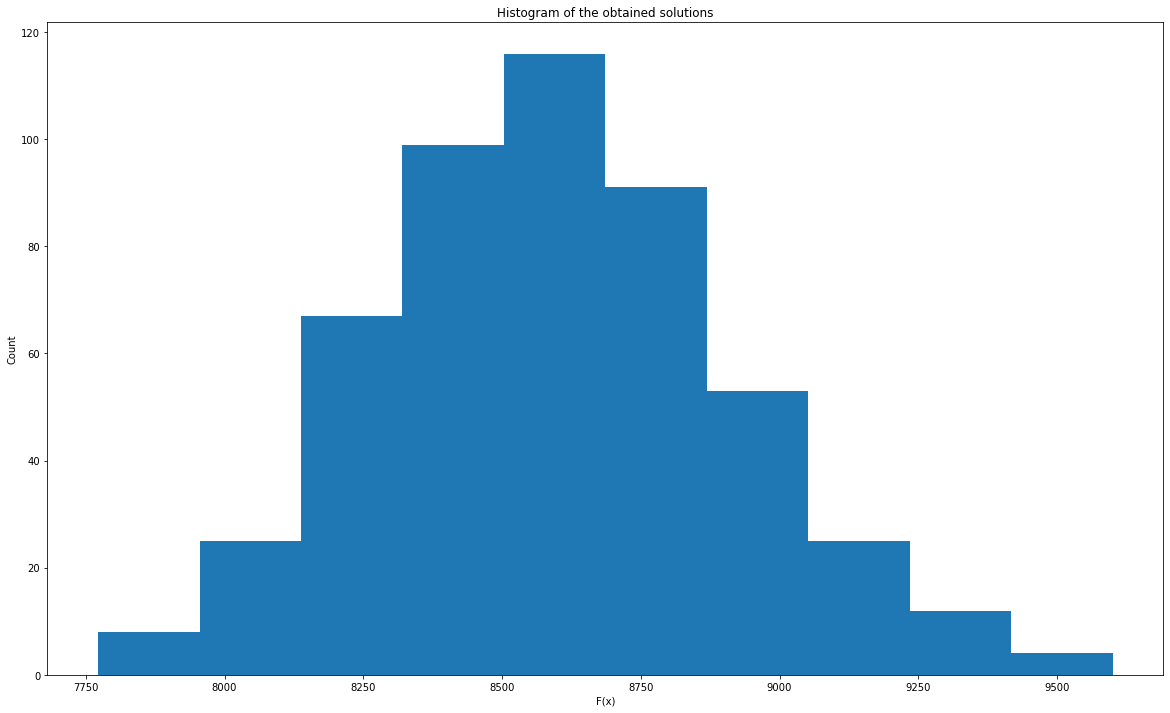

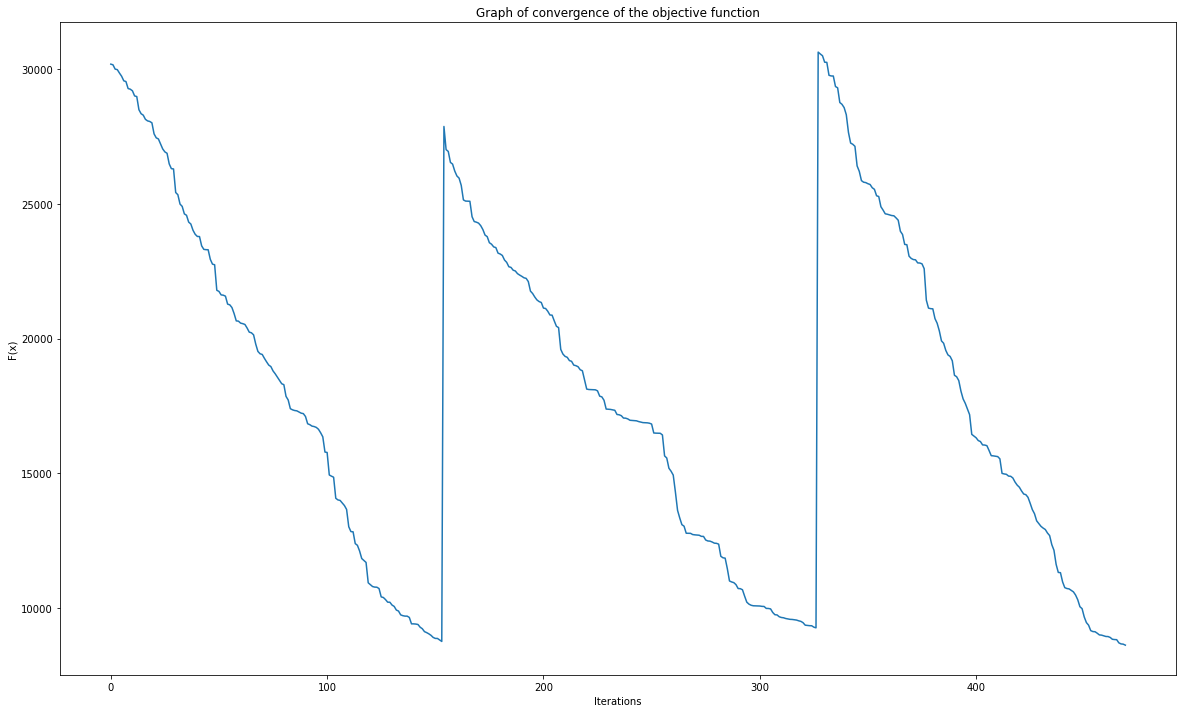

In [6]:
coordinates = readCoordinates("data/berlin52.txt")

numberOfCities = len(coordinates)

initialTour = generateInitialTour(numberOfCities)

maxIterations = 200

numberOfStarts = 500

tours = hillClimbing(
    numberOfCities, maxIterations, coordinates, numberOfStarts)

bestTour, worstTour, difference = calcCharacteristics(tours)

printCharacteristics(tours, bestTour, worstTour, difference)

printHist(tours)

printDiagram(tours, maxIterations)